# Numpy Intro

Figures taken from L. Maximov's Numpy tutorial
https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d

In [1]:
import numpy as np

__________________________________________________________________
## Array generation
![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*cyN_FxUVbkdDyrULhfTIGw.png)

[zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)
[zeros_like](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html)

[ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html)
[ones_like](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html)

In [2]:
a = np.array([1,2,3])
np.ones_like(a)

array([1, 1, 1])

![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*NNCWBPDCPfLtNYDc_ul5SA.png)

[arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)
[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [3]:
np.arange(5)

array([0, 1, 2, 3, 4])

__________________________________________________________________
## Array math operations
![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*RNfQubSwH_6-GnWHVjn9CQ.png)

### Broadcasting
![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*VyadDu7CyuF5-7rKVoFSrw.png)

[built-in operators](https://docs.python.org/3/library/operator.html)

In [4]:
a = np.arange(3)
a + 3

array([3, 4, 5])

__________________________________________________________________
## Math operations
![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Pc4t0jilbHSM0sMwtVNGIA.png)
![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*wyHVvsoUdsHA0RedM6kdvQ.png)

[sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html)
[exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html)
[log](https://numpy.org/doc/stable/reference/generated/numpy.log.html)

[sin](https://numpy.org/doc/stable/reference/generated/numpy.sin.html)
[cos](https://numpy.org/doc/stable/reference/generated/numpy.cos.html)
[arctan2](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html)

In [17]:
a = np.arange(6)
a**2

array([ 0,  1,  4,  9, 16, 25])

__________________________________________________________________
## Indexing I
![image info](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*4xpufyWZWcIbabsOHVlc4g.png)

In [5]:
a = np.arange(1,6)
a[[1,-1]]

array([2, 5])

### Boolean indexing

![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*nFGcXav_xxD7TXGiRYMpHg.png)

In [8]:
a = 7-np.abs(np.arange(13) - 6)
print(a)
a > 5

[1 2 3 4 5 6 7 6 5 4 3 2 1]


array([False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False])

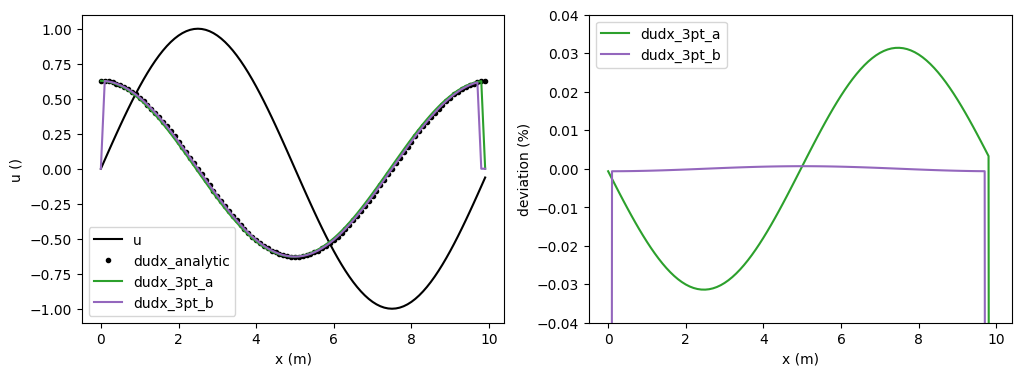

In [2]:
#Consider a single-cycle sine wave, u, in spatial coordinates as initial condition for a pressure field, 
#from which the first spatial derivative is to be computed by means of a finite-difference expression. 
#
#a) Write a script that calculates and displays the derivative of u. 
#b) Compare the numerical solution with the analytical solution.

import numpy as np
from matplotlib import pyplot as plt
#Basic parameters
#---------------------------------------------------------------
nx = 100      # number of grid points in x
dx = 0.1     # grid point distance in m
x_vec = np.arange(0, nx)*dx  # initialize space coordinates
_lambda = 10.0  # wavelength, happens to be nx*dx
k = 2*np.pi/_lambda  # wavenumber
u = np.sin(k*x_vec)  #signal

dudx_3pt_a = np.zeros(nx)  # 3-point stencil, version a
dudx_3pt_b = np.zeros(nx)  # 3-point stencil, version b

#FD, 3-point stencil, version a
for i in range(0, nx-1):
    dudx_3pt_a[i] = (u[i+1] - u[i])/(dx)
#Alternatively, the loop could be replaced by the vectorized expression
#dudx_3pt_a = np.diff(u)/dx

#FD, 3-point stencil, version b
for i in range(1, nx-2):
    dudx_3pt_b[i] = (u[i+1] - u[i-1])/(2*dx)

# analytical solution for du/dx
dudx_an = k*np.cos(k*x_vec) 

#plotting
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
col = plt.cm.tab10.colors[::2]

ax1.plot(x_vec, u, color=3*[0], label='u')
ax1.plot(x_vec, dudx_an, '.', color=3*[0], label='dudx_analytic')
ax1.plot(x_vec, dudx_3pt_a, '-', color=col[1], label='dudx_3pt_a')
ax1.plot(x_vec, dudx_3pt_b, '-', color=col[2], label='dudx_3pt_b')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('u ()')
ax1.legend()

ax2.plot(x_vec, (1/k)*(dudx_3pt_a - dudx_an), color=col[1], label='dudx_3pt_a')
ax2.plot(x_vec, (1/k)*(dudx_3pt_b - dudx_an), color=col[2], label='dudx_3pt_b')
ax2.set_ylim([-0.04, 0.04])
ax2.set_xlabel('x (m)')
ax2.set_ylabel('deviation (%)')
ax2.legend()

_____________________________________________________
# "Going beyond vectors"
____________________________________________________

In [9]:
def demo_array(dim: tuple, verbose = True):
    dim = dim
    matrix = np.zeros(dim)

    for idcs,_ in np.ndenumerate(matrix):
        matrix[idcs] = np.sum(idcs)

    if verbose:
        print(matrix)
        
    return matrix

a = demo_array((3,3))

[[0. 1. 2.]
 [1. 2. 3.]
 [2. 3. 4.]]


## Matrix arrays
![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*aLMuXA81pDXaw0J0QdKvRQ.png)

![image info](https://miro.medium.com/v2/resize:fit:720/format:webp/1*jmXqsVUNaBaUsBAkHgqb3A.png)

[sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)
[median](https://numpy.org/doc/stable/reference/generated/numpy.median.html)
[mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

In [10]:
a = demo_array((3,3))
a.sum

[[0. 1. 2.]
 [1. 2. 3.]
 [2. 3. 4.]]


<function ndarray.sum>

__________________________________________________________________
## Indexing II
![image info](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*brbsl7QFZGWfmvgFHMwt9Q.png)

In [24]:
a = demo_array((3,4))
a[:]

[[0. 1. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]]


array([[0., 1., 2., 3.],
       [1., 2., 3., 4.],
       [2., 3., 4., 5.]])

__________________________________________________________________
## Higher-dimensional arrays
![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*BAr1RXkpGJD5lcwbTePGLA.png)

[ndim](https://numpy.org/doc/stable/reference/generated/numpy.ndim.html)
[shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)
[size](https://numpy.org/doc/stable/reference/generated/numpy.size.html)

In [12]:
a = demo_array((3,2,4))
a.size

[[[0. 1. 2. 3.]
  [1. 2. 3. 4.]]

 [[1. 2. 3. 4.]
  [2. 3. 4. 5.]]

 [[2. 3. 4. 5.]
  [3. 4. 5. 6.]]]


24

__________________________________________________________________
__________________________________________________________________
__________________________________________________________________
## Further array operations

![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*bUfuXiTZOas6ZSD_lOSbXA.png)

[stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html)

![image info](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*EJiDVb9xb8VL9XmFDevSGg.png)

[swapaxes](https://numpy.org/doc/stable/reference/generated/numpy.swapaxes.html)